In [1]:
import config
import mysql.connector 
import requests
import json
from bs4 import BeautifulSoup
from mysql.connector import errorcode
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = 'Movies'
)
cursor = cnx.cursor()

In [2]:
cursor.execute("""select   count(d.director), avg(o.imdb_rating), d.director  from Movies.OMDb_Directors d join Movies.OMDb_Top_250_and_Low_100 o
where d.movie_name = o.movie_name
group by d.director
order by count(d.director) desc 
limit 20

;""")

In [3]:
df = pd.DataFrame(cursor.fetchall())

In [23]:
df.columns = ['num_of_directed_movie','avg_imdb_rating', 'directors']
list(df.directors)
df

,num_of_directed_movie,avg_imdb_rating,directors
0,7,8.314286,Martin Scorsese
1,7,8.314286,Stanley Kubrick
2,7,8.557143,Christopher Nolan
3,6,8.250000,Hayao Miyazaki
4,6,2.750000,Aaron Seltzer
5,6,8.300000,Billy Wilder
6,6,8.316667,Alfred Hitchcock
7,6,8.383333,Steven Spielberg
8,5,8.400000,Quentin Tarantino
9,5,2.740000,Jason Friedberg


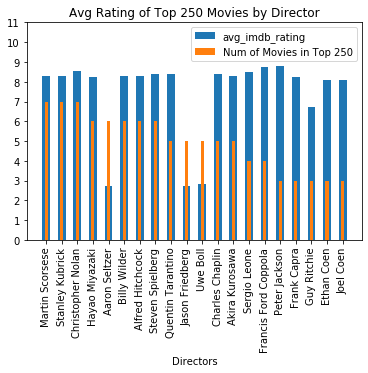

In [24]:
plt.bar(df.directors,  df.avg_imdb_rating, width= 0.5, label = 'avg_imdb_rating')
plt.bar(df.directors, df.num_of_directed_movie , width=0.2, label = 'Num of Movies in Top 250')
plt.xticks(['Martin Scorsese',
 'Stanley Kubrick',
 'Christopher Nolan',
 'Hayao Miyazaki',
 'Aaron Seltzer',
 'Billy Wilder',
 'Alfred Hitchcock',
 'Steven Spielberg',
 'Quentin Tarantino',
 'Jason Friedberg',
 'Uwe Boll',
 'Charles Chaplin',
 'Akira Kurosawa',
 'Sergio Leone',
 'Francis Ford Coppola',
 'Peter Jackson',
 'Frank Capra',
 'Guy Ritchie',
 'Ethan Coen',
 'Joel Coen'], rotation  = 90)
plt.yticks(np.arange(0,12,1))
plt.xlabel('Directors')
plt.title('Avg Rating of Top 250 Movies by Director')
plt.legend()